In [1]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 使用 Microsoft YaHei 或 SimSun 字体，这两种字体在大部分 Windows 系统上都可以找到
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
from LinearRegression import load_data, data_processing, LinearRegression, r2_score

In [2]:
# 加载数据
X_train, X_test, y_train, y_test = load_data('boston_house_prices.csv', test_size=0.2, random_state=42)

# 数据处理
X_train_scaled, X_test_scaled = data_processing(X_train, X_test)

# 设置训练参数
num_features = X_train_scaled.shape[1]
num_of_weights = num_features + 1
num_epochs = 300
eta = 0.01
batch_size = 32

# 实例化模型
model_bgd = LinearRegression(num_of_weights)
model_mbgd = LinearRegression(num_of_weights)

# 比较批量梯度下降和小批量梯度下降的性能
start_time_bgd = timeit.default_timer()
loss_list_bgd = model_bgd.train_BGD(X_train_scaled, y_train, num_epochs, eta)
end_time_bgd = timeit.default_timer()
time_bgd = end_time_bgd - start_time_bgd

start_time_mbgd = timeit.default_timer()
loss_list_mbgd = model_mbgd.train_MBGD(X_train_scaled, y_train, num_epochs, eta, batch_size)
end_time_mbgd = timeit.default_timer()
time_mbgd = end_time_mbgd - start_time_mbgd

print(f"批量梯度下降耗时: {time_bgd:.4f} 秒")
print(f"小批量梯度下降耗时: {time_mbgd:.4f} 秒")



特征名称： ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
标签名称： MEDV
样本量： 506
数据集前几行：
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
第100次迭代，损失函数值：30.63447818010301
第200次迭代，损失函数值：22.586108530878477
第300次迭代，损失函数值：22.09466045307221
第100次迭代，损失函数值：21.62510835274954
第200次迭代，损失函数值：21.61507696849827
第300次迭代，损失函数值：21.621373784049087
批量梯度下降耗时: 0.0118 秒
小批量梯度下降耗时: 0.0533 秒


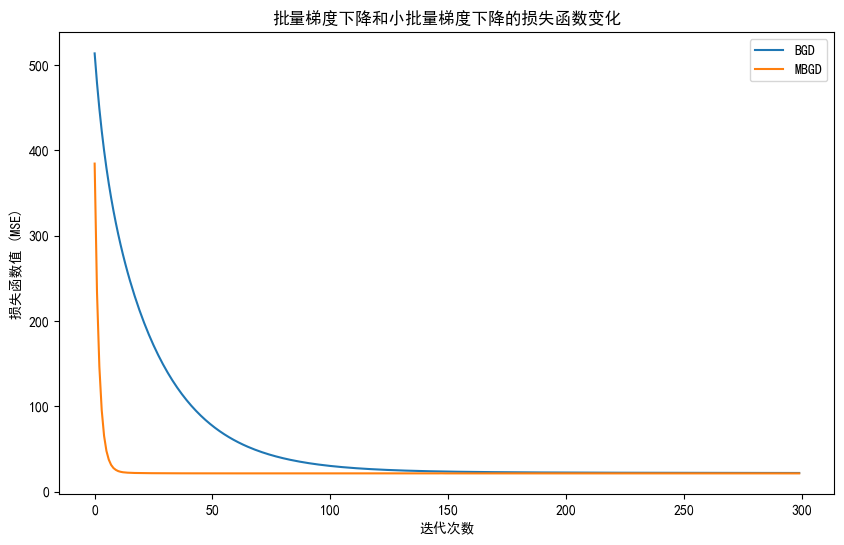

In [3]:
# 画出损失函数随迭代次数的变化曲线
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_list_bgd, label='BGD')
plt.plot(range(num_epochs), loss_list_mbgd, label='MBGD')
plt.xlabel('迭代次数')
plt.ylabel('损失函数值 (MSE)')
plt.title('批量梯度下降和小批量梯度下降的损失函数变化')
plt.legend()
plt.show()

In [4]:
# 模型评估
y_test_pred_bgd = model_bgd.forward(X_test_scaled)
y_test_pred_mbgd = model_mbgd.forward(X_test_scaled)

# 计算 MSE
test_mse_bgd = np.mean((y_test_pred_bgd - y_test) ** 2)
test_mse_mbgd = np.mean((y_test_pred_mbgd - y_test) ** 2)

# 计算 R²
r2_bgd = r2_score(y_test, y_test_pred_bgd)
r2_mbgd = r2_score(y_test, y_test_pred_mbgd)

# 输出结果
print(f'批量梯度下降测试集上的均方误差（MSE）：{test_mse_bgd}')
print(f'批量梯度下降测试集上的决定系数（R²）：{r2_bgd}')
print(f'小批量梯度下降测试集上的均方误差（MSE）：{test_mse_mbgd}')
print(f'小批量梯度下降测试集上的决定系数（R²）：{r2_mbgd}')


批量梯度下降测试集上的均方误差（MSE）：26.20765815847655
批量梯度下降测试集上的决定系数（R²）：0.6461283395888133
小批量梯度下降测试集上的均方误差（MSE）：24.42106560969326
小批量梯度下降测试集上的决定系数（R²）：0.6702519933656279


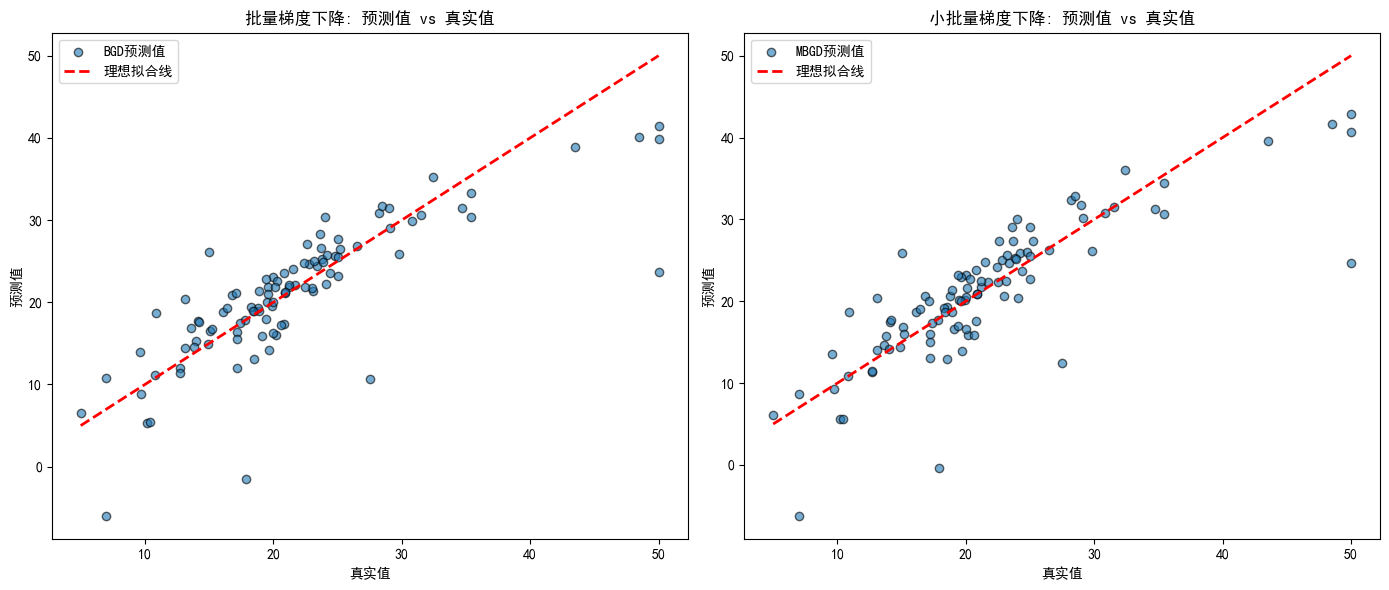

In [5]:
# 可视化 1：预测值与真实值的散点图
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_bgd, alpha=0.6, edgecolors='k', label='BGD预测值')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='理想拟合线')
plt.title('批量梯度下降: 预测值 vs 真实值')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_mbgd, alpha=0.6, edgecolors='k', label='MBGD预测值')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='理想拟合线')
plt.title('小批量梯度下降: 预测值 vs 真实值')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.legend()

plt.tight_layout()
plt.show()

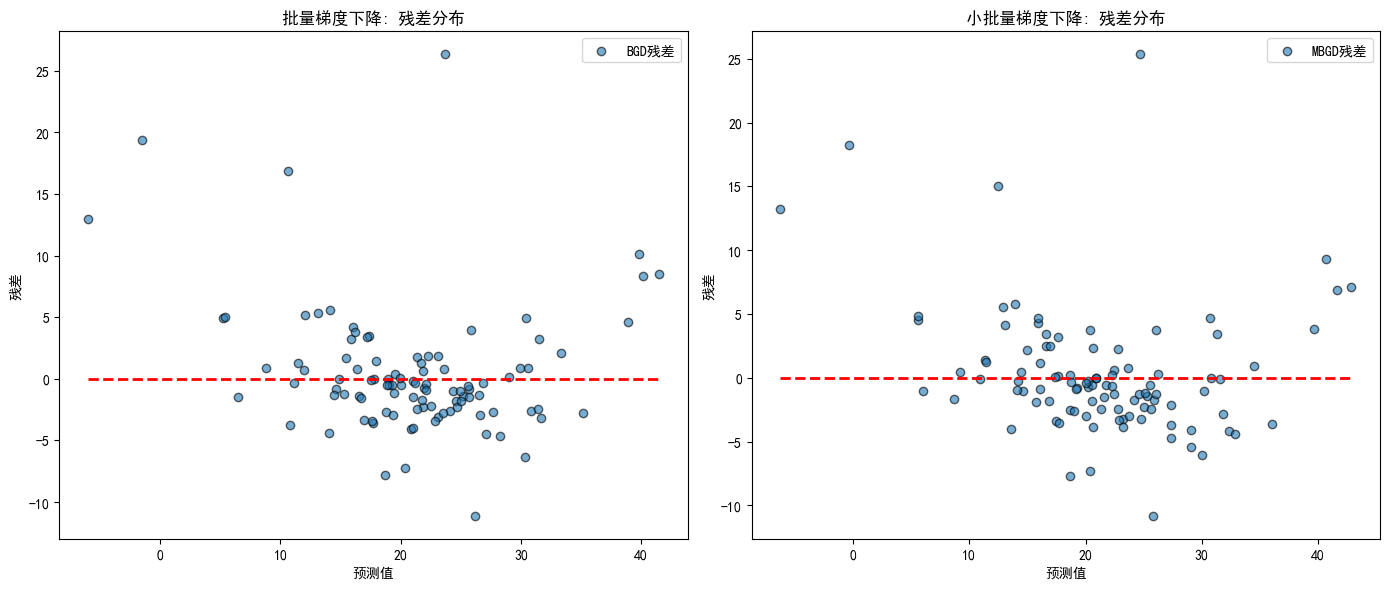

In [6]:
# 可视化 2：残差分布图
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
residuals_bgd = y_test - y_test_pred_bgd
plt.scatter(y_test_pred_bgd, residuals_bgd, alpha=0.6, edgecolors='k', label='BGD残差')
plt.hlines(y=0, xmin=y_test_pred_bgd.min(), xmax=y_test_pred_bgd.max(), colors='r', linestyles='--', lw=2)
plt.title('批量梯度下降: 残差分布')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.legend()

plt.subplot(1, 2, 2)
residuals_mbgd = y_test - y_test_pred_mbgd
plt.scatter(y_test_pred_mbgd, residuals_mbgd, alpha=0.6, edgecolors='k', label='MBGD残差')
plt.hlines(y=0, xmin=y_test_pred_mbgd.min(), xmax=y_test_pred_mbgd.max(), colors='r', linestyles='--', lw=2)
plt.title('小批量梯度下降: 残差分布')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.legend()

plt.tight_layout()
plt.show()